In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')

In [9]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,...,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN,NaN,NaN
1,"Belarus, Rep. of",913,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,...,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN,NaN,NaN
2,"Tajikistan, Rep. of",923,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,...,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Azerbaijan, Rep. of",912,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,...,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN,NaN,NaN
4,Vietnam,582,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,...,0.456400,0

## Take on only Armenia values

In [10]:
df_armenia = df[df['Country Name'].str.contains('Armenia')]
df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
len(df_armenia.columns)

244

In [12]:
df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
156,1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751,0.127133,-0.33717,-1.039515,-1.611476,-1.175433,0.578345,0.343104,0.122085,1.003735,1.481059,1.833866,0.617026,0.110924,-0.073714,-0.443939,-1.909741,-1.943956,-0.441296,0.195058,0.550208,1.051402,1.252837,1.377329,-0.20318,NaN,NaN


In [0]:
new_df = pd.DataFrame({'Inflation':df_armenia.values[0]})

In [14]:
new_df

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
239,1.252837
240,1.377329
241,-0.203180
242,NaN


In [0]:
train_armenia = new_df[:int(0.6*(len(new_df)))]
val_armenia = new_df[int(0.6*(len(new_df))):int(0.8*(len(new_df)))]
test_armenia = new_df[int(0.8*(len(new_df))):]

In [16]:
train_armenia

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
141,0.336123
142,1.174566
143,2.508480
144,3.563135


In [17]:
!pip3 install pyramid-arima

In [0]:
import matplotlib.pyplot as plt

## Auto-ARIMA model

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.304, BIC=567.206, Fit time=0.273 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=592.178, BIC=598.145, Fit time=0.010 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=568.857, BIC=577.808, Fit time=0.024 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=558.665, BIC=567.616, Fit time=0.030 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=551.675, BIC=566.593, Fit time=0.175 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.695, BIC=570.580, Fit time=0.245 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.858, BIC=575.776, Fit time=0.088 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=556.797, BIC=577.682, Fit time=0.343 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.665, BIC=572.600, Fit time=0.049 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1);

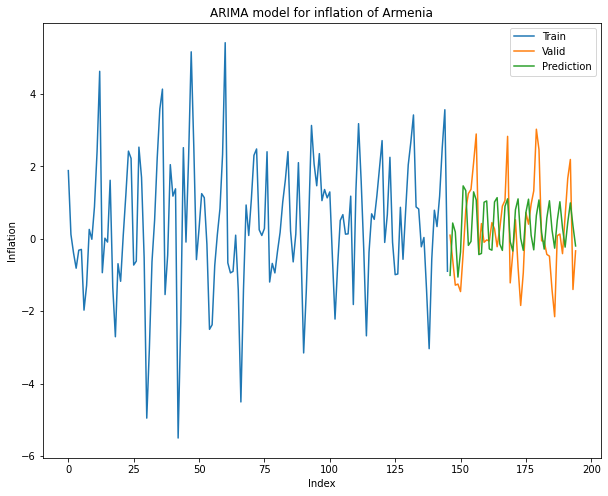

In [19]:
from pyramid.arima import auto_arima
model = auto_arima(train_armenia, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_armenia)

forecast = model.predict(n_periods=len(val_armenia))
forecast = pd.DataFrame(forecast,index = val_armenia.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(10, 8))
plt.plot(train_armenia, label='Train')
plt.plot(val_armenia, label='Valid')
plt.plot(forecast, label='Prediction')
plt.xlabel('Index')
plt.ylabel('Inflation')
plt.title('ARIMA model for inflation of Armenia')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(val_armenia, forecast))
print('RMSE:', rms)
mse = mean_squared_error(val_armenia, forecast)
print('MSE:', mse)
mae = mean_absolute_error(val_armenia, forecast)
print('MAE:', mae)

RMSE: 1.1646022341722286
MSE: 1.3562983638389463
MAE: 0.9979616637290145


In [21]:
len(df['Country Code'].unique()), len(df['Country Code'])

(179, 179)

In [0]:
df.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)

In [23]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,"Belarus, Rep. of",913,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,"Tajikistan, Rep. of",923,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Azerbaijan, Rep. of",912,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,Vietnam,582,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249

In [0]:
df_inflation = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

In [25]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801

In [26]:
df_inflation.head(50)

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801

In [27]:
df_inflation.shape

(179, 242)

In [0]:
# create new dataframe with 13 columns
# df um amen mi row um avelacnel - 13 syun, mek - mek shift arac, mi hat el syun - predictable monthy

In [0]:
import pandas as pd

In [0]:
lst = []
for i, row in df_inflation.iterrows():
  # print('row:', type(row))
  for j, column in row.iteritems():
      if not pd.isnull(column):
        # print('column', column)
        # print('row j:', row[j:])
        lst.append(row[j:])
        break

In [0]:
# month_col = df_inflation.columns[22]
# calendar.month_name[int(month_col[month_col.find('M') + 1:])]

In [0]:
# df = pd.DataFrame()
import calendar
res_lst = []
for ls in lst:
  for i in range(len(ls)-12):
    values = ls[i:i+13].values.tolist()
    month_col = ls[i+12:i+13].index[0]
    str_month = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
    values.append(str_month)
    res_lst.append(values)

In [0]:
df_ = pd.DataFrame(res_lst, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'target', 'month'])

In [32]:
df_[df_.isnull().sum(axis=1) > 0].shape

(1554, 14)

In [0]:
Indexes = df_[df_.isnull().sum(axis = 1) > 0].index
df_.drop(Indexes , inplace=True)

In [34]:
df_.shape

(38263, 14)

In [35]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,January
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,February
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,March
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,April
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,May


In [0]:
res_df = df_.copy()

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [40]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,4
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,3
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,7
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,0
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,8


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train['month']

26790    10
628       3
33021     4
29248    10
5056      4
         ..
6518      9
11639     2
39706     2
895       7
16324     2
Name: month, Length: 30610, dtype: int64

In [46]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, y_train)

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        global dtrain    
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l2'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=42, stratified=False, verbose_eval =None, metrics=['l2'])
        
        return -np.min(cv_result['l2-mean'])

# Domain space-- Range of hyperparameters
pds = {'num_leaves': (45, 60),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

optimizer.max['params']

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  1        | -1.342    |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  53.08    |
|  2        | -1.35     |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  57.06    |
|  3        | -1.387    |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.78    |
|  4        | -1.388    |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  53.23    |
|  5        | -1.351    |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.02    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        | -1.36     |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  45.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        | -1.351    |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  60.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        | -1.348    |  0.8794   |  0.785    |  12.99    |  41.61    |  0.006116 |  45.07    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        | -1.346    |  0.9066   |  0.8999   |  12.98    |  38.05    |  0.01481  |  52.91    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       | -1.358    |  0.9927   |  0.7728   |  9.008    |  30.73    |  0.01474  |  51.64    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       | -1.348    |  0.8614   |  0.8293   |  9.206    |  37.07    |  0.03144  |  45.07    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       | -1.343    |  0.8795   |  0.6946   |  12.91    |  44.63    |  0.03054  |  59.89    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       | -1.346    |  0.8949   |  0.4655   |  9.02     |  30.46    |  0.09541  |  59.95    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       | -1.345    |  0.9947   |  0.8896   |  9.327    |  41.47    |  0.006838 |  59.7     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       | -1.349    |  1.0      |  0.9      |  12.86    |  37.07    |  0.1      |  59.88    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       | -1.342    |  0.9744   |  0.8681   |  12.74    |  43.03    |  0.03019  |  55.5     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       | -1.347    |  0.9162   |  0.8954   |  9.777    |  39.44    |  0.08401  |  50.47    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       | -1.388    |  0.8282   |  0.1529   |  12.99    |  38.95    |  0.09321  |  47.91    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       | -1.34     |  0.8613   |  0.6206   |  12.21    |  49.83    |  0.0531   |  45.49    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       | -1.343    |  0.8817   |  0.8614   |  9.106    |  44.51    |  0.06309  |  45.26    |


{'bagging_fraction': 0.8613387801815556,
 'feature_fraction': 0.6206018408969992,
 'max_depth': 12.208222001167158,
 'min_child_weight': 49.82795578998086,
 'min_split_gain': 0.05309933369163041,
 'num_leaves': 45.48622961378838}

In [47]:
lgb_train = dtrain
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {'bagging_fraction': 0.8613387801815556,
 'feature_fraction': 0.6206018408969992,
 'max_depth': 12,
 'min_child_weight': 49.82795578998086,
 'min_split_gain': 0.05309933369163041,
 'num_leaves': 45}

print('Starting training...')
# train
gbm = lgb.train(params, lgb_train)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The mse of prediction is:', mean_squared_error(y_test, y_pred))

Starting training...
Saving model...
Starting predicting...
The mse of prediction is: 1.8435409244870358


In [0]:
# import lightgbm as lgb
# import pandas as pd
# from sklearn.metrics import mean_squared_error

# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # specify your configurations as a dict
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'l1'},
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=20,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=5)

# print('Saving model...')
# # save model to file
# gbm.save_model('model.txt')

# print('Starting predicting...')
# # predict
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# # evalimport lightgbm as lgb
# import pandas as pd
# from sklearn.metrics import mean_squared_error

# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # specify your configurations as a dict
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'l1'},
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=20,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=5)

# print('Saving model...')
# # save model to file
# gbm.save_model('model.txt')

# print('Starting predicting...')
# # predict
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# # eval

In [0]:
# print('The MAE of prediction is:', mean_absolute_error(y_test, y_pred))
# print('The MSE of prediction is:', mean_squared_error(y_test, y_pred))
# print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

## Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# print(RForest.score(X_train,y_train))
# print(RForest.score(X_test, y_test))

In [50]:
# print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MSE: 2.082904984797065


### Hyperparameter tuning for RF

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 21, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 11, 12, 13, 14, 16, 17, 18, 19, 21, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 5, verbose=2, random_state=42)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  33.2s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.2s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  32.8s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  32.9s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  33.0s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  33.0s
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=3

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 39.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [53]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 244,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [54]:
predictions = rf_random.best_estimator_.predict(X_test)
# print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
# print('RF score:', rf_random.score(X_train, y_train))
# print('RF score:', rf_random.score(X_test, y_test))

MSE: 1.8163448159888946


## Creating a Neural Net Model with Multiple Inputs

The first submodel will accept textual input in the form of months. This submodel will consist of an input shape layer, an embedding layer, and an LSTM layer of 128 neurons. The second submodel will accept input in the form of meta information from the 0-11 columns. The second submodel also consist of three layers. An input layer and two dense layers.

The output from the LSTM layer of the first submodel and the output from the second dense layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have one neuron corresponding to inflation number.

In [87]:
# !pip3 install tensorflow==1.15

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 55.8MB/s 
     |████████████████████████████████| 512kB 63.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8da3fa4c863689b6c8a17935bd618a8a168b884025f6aaabc46ccc2bf1523af4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc

In [37]:
np.unique(res_df['month'].values)

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [0]:
# res_df['month'] = res_df['month'].apply(lambda x: calendar.month_name[x + 1])

In [0]:
X = res_df.drop('target', axis=1)

y = res_df['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train = X[:int(0.8*(len(X)))]
y_train = y[:int(0.8*(len(y)))]
X_test = X[int(0.8*(len(X))):]
y_test = y[int(0.8*(len(y))):]

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X1_train = []
sentences = list(X_train["month"])
for sen in sentences:
    X1_train.append(sen)

In [0]:
X1_test = []
sentences = list(X_test["month"])
for sen in sentences:
    X1_test.append(sen)

In [0]:
# X1_train

In [43]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=12)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 1

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [0]:
maxlen = 1
vocab_length = 15

In [0]:
X2_train = X_train.drop('month', axis=1).values

In [0]:
# X2_train

In [0]:
X2_test = X_test.drop('month', axis=1).values

In [0]:
# maxlen

In [48]:
input_1 = Input(shape=(maxlen,))

input_2 = Input(shape=(12,))

In [49]:
embedding_layer = Embedding(vocab_size, 8, input_length=maxlen)(input_1)
# flatten_embedding = Flatten()(embedding_layer)
dense_layer_embedding = Dense(10, activation='relu')(embedding_layer)
LSTM_Layer_1 = LSTM(128)(dense_layer_embedding)

In [0]:
# X_train

In [0]:
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [0]:
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='sigmoid')(concat_layer)
output = Dense(1, activation='linear')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [52]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001) # , decay=0.01/25
# sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=adam)
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 8)         104         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 12)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 10)        90          embedding_1[0][0]                
___________________________________________________________________________________________

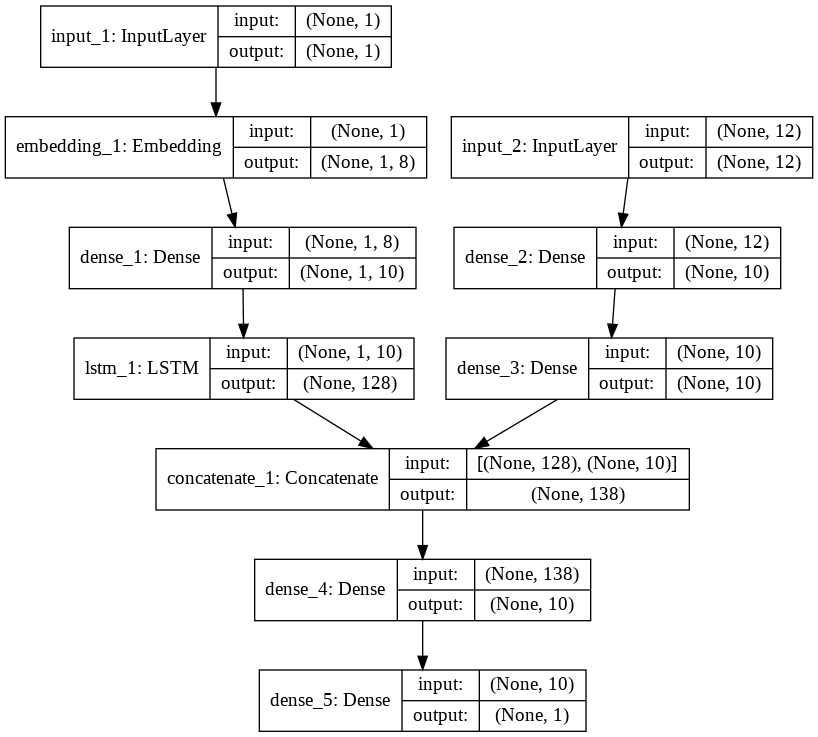

In [53]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [0]:
X1_train

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_100.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [56]:
history = model.fit(x=[X1_train, X2_train], y=y_train, epochs=50, verbose=1, validation_split=0.2, callbacks=[mc])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 24488 samples, validate on 6122 samples
Epoch 1/50





24488/24488 [==============================] - 9s 358us/step - loss: 1.2156 - val_loss: 0.9400

Epoch 00001: val_loss improved from inf to 0.94000, saving model to best_model_100.h5
Epoch 2/50
24488/24488 [==============================] - 5s 212us/step - loss: 1.0749 - val_loss: 0.9243

Epoch 00002: val_loss improved from 0.94000 to 0.92433, saving model to best_model_100.h5
Epoch 3/50
24488/24488 [==============================] - 5s 213us/step - loss: 1.0565 - val_loss: 0.9277

Epoch 00003: val_loss did not improve from 0.92433
Epoch 4/50
24488/24488 [==============================] - 5s 212us/step - loss: 1.0441 - val_loss: 0.9240

Epoch 00004: val_loss improved from 0.92433 to 0.92397, saving model to best_model_100.h5
Epoch 5/50
24488/24488 [==============================] - 5s 215us/step - loss: 1.0367 - val_loss: 0.919

In [0]:
from keras.models import load_model

In [58]:
# load the saved model
saved_model = load_model('best_model_100.h5')
saved_model.evaluate([X1_train, X2_train], y_train, verbose=0), saved_model.evaluate([X1_test, X2_test], y_test, verbose=0)

(0.9441563080345171, 3.7919215333044303)

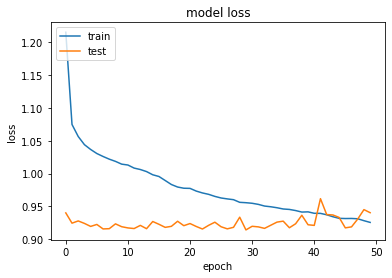

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()